In [10]:
import sys
sys.path.append(r'C:\Users\flowerm\PyDev\segyio\venv\Lib\site-packages')
import glob
import re
import segyio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
    

In [12]:
path_to_files = 'data\\MATAI_2003\\'
test_file_3d = r'data\KERRY-3D\BO_Kerry3D.sgy'
test_file_2d = r'data\MATAI_2003\DP15_FINAL_migration_nogain-PR2897_m3.sgy'
usgs_file_2d = r'data\USGS\3X_75_PR.SGY'


In [13]:
def parse_trace_headers(segyfile, n_traces):
    '''
    Parse the segy file trace headers into a pandas dataframe.
    Column names are defined from segyio internal tracefield
    One row per trace
    '''
    # Get all header keys
    headers = segyio.tracefield.keys
    # Initialize dataframe with trace id as index and headers as columns
    df = pd.DataFrame(index=range(1, n_traces + 1),
                      columns=headers.keys())
    # Fill dataframe with all header values
    for k, v in headers.items():
        df[k] = segyfile.attributes(v)[:]
    return df


def parse_text_header(segyfile):
    '''
    Format segy text header into a readable, clean dict
    '''
    raw_header = segyio.tools.wrap(segyfile.text[0])
    # Cut on C*int pattern
    cut_header = re.split(r'C ', raw_header)[1::]
    # Remove end of line return
    text_header = [x.replace('\n', ' ') for x in cut_header]
    text_header[-1] = text_header[-1][:-2]
    # Format in dict
    clean_header = {}
    i = 1
    for item in text_header:
        key = "C" + str(i).rjust(2, '0')
        i += 1
        clean_header[key] = item
    return clean_header


def get_file_names(path):
    return [glob.glob(f'{path}*.sgy')]
    

In [14]:
files = get_file_names(path_to_files)
df_dict = {}
for file in files:
    with segyio.open(file, ignore_geometry=True) as f:
        n_traces = f.tracecount
        trace_headers = parse_trace_headers(f, n_traces)
        df_dict[file] = trace_headers

FileNotFoundError: [Errno 2] No such file or directory

In [4]:
# with segyio.open(test_file_2d, ignore_geometry=True) as f:
#     n_traces = f.tracecount
#     sample_rate = segyio.tools.dt(f) / 1000
#     n_samples = f.samples.size
#     twt = f.samples
#     data = f.trace.raw[:] # Get all data into memory (could cause on big files)
#     # load headers
#     bin_headers = f.bin
#     text_headers = parse_text_header(f)
#     trace_headers = parse_trace_headers(f, n_traces)


In [5]:
f'N Traces: {n_traces}, N Samples: {n_samples}, Sample rate: {sample_rate}ms'

'N Traces: 503, N Samples: 4001, Sample rate: 2.0ms'

In [6]:
bin_headers

{JobID: 9999, LineNumber: 4, ReelNumber: 0, Traces: 512, AuxTraces: 0, Interval: 2000, IntervalOriginal: 2000, Samples: 4001, SamplesOriginal: 0, Format: 1, EnsembleFold: 51, SortingCode: 4, VerticalSum: 512, SweepFrequencyStart: 0, SweepFrequencyEnd: 0, SweepLength: 0, Sweep: 0, SweepChannel: 0, SweepTaperStart: 0, SweepTaperEnd: 0, Taper: 0, CorrelatedTraces: 0, BinaryGainRecovery: 0, AmplitudeRecovery: 0, MeasurementSystem: 1, ImpulseSignalPolarity: 0, VibratoryPolarity: 0, SEGYRevision: 0, TraceFlag: 0, ExtendedHeaders: 0}

In [9]:
trace_headers.head()

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,TraceIdentifier,ScalarTraceHeader,SourceType,SourceEnergyDirectionMantissa,SourceEnergyDirectionExponent,SourceMeasurementMantissa,SourceMeasurementExponent,SourceMeasurementUnit,UnassignedInt1,UnassignedInt2
1,1,1,10000,1,31000,15505,1,1,1,1,...,0,10000,0,138,31000,0,0,0,0,0
2,2,2,10000,1,31001,15506,2,1,1,1,...,0,10000,0,125,31001,0,0,0,0,0
3,3,3,10000,1,31001,15507,3,1,1,1,...,0,10000,0,120,31001,0,0,0,0,0
4,4,4,10000,1,31002,15508,4,1,1,1,...,0,10000,0,115,31002,0,0,0,0,0
5,5,5,10000,1,31002,15509,5,1,1,1,...,0,10000,0,112,31002,0,0,0,0,0


In [10]:
trace_headers.loc[100, 'FieldRecord']

10004

Text(0.5, 1.0, 'Basic Header QC')

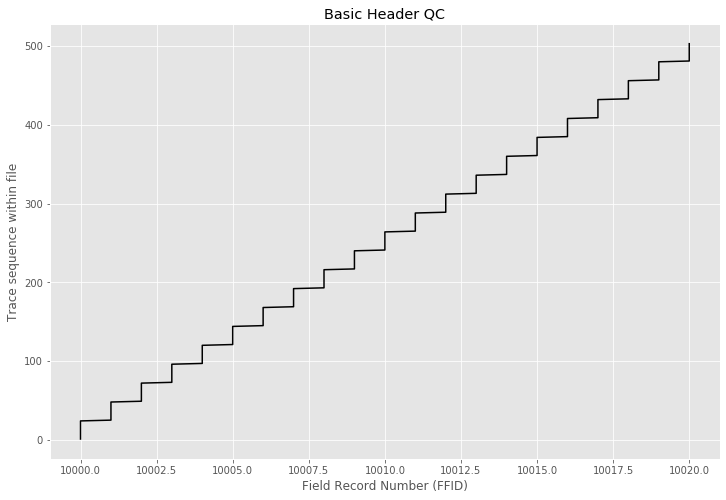

In [11]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(trace_headers['FieldRecord'], trace_headers['TRACE_SEQUENCE_FILE'], '-k')
ax.set_xlabel('Field Record Number (FFID)')
ax.set_ylabel('Trace sequence within file')
ax.set_title('Basic Header QC')

In [12]:
clip_percentile = 99
vm = np.percentile(data, clip_percentile)
f'The {clip_percentile}th percentile is {vm:.0f}; the max aplitude is {data.max():.0f}'

'The 99th percentile is 213; the max aplitude is 904'

Text(0.5, 1.0, 'data\\MATAI_2003\\DP15_FINAL_migration_nogain-PR2897_m3.sgy')

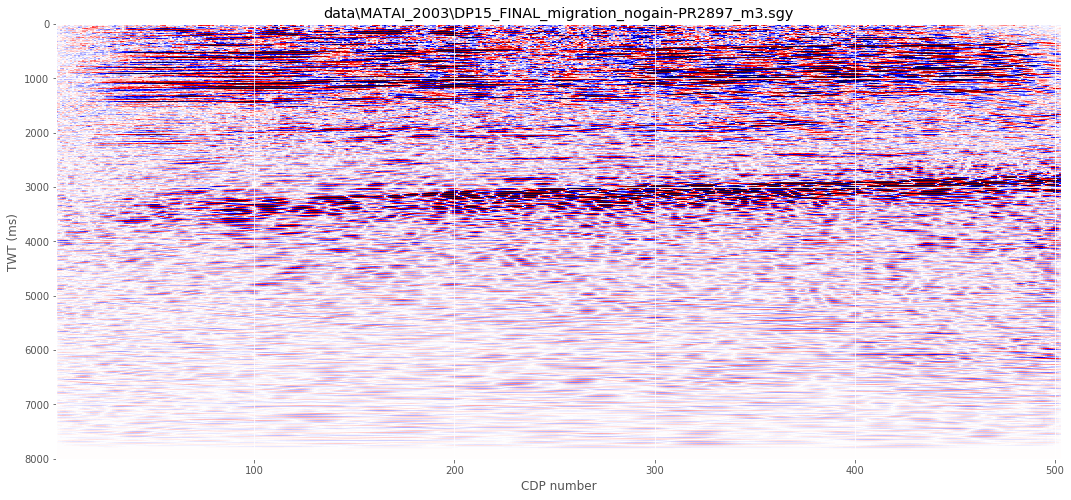

In [13]:
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(1,1,1)
extent = [1, n_traces, twt[-1], twt[0]]
ax.imshow(data.T, cmap="seismic", vmin=-vm, vmax=vm, aspect='auto', extent=extent)
ax.set_xlabel('CDP number')
ax.set_ylabel('TWT (ms)')
ax.set_title(f'{test_file_2d}')

Text(0.5, 1.0, 'XY Source QC')

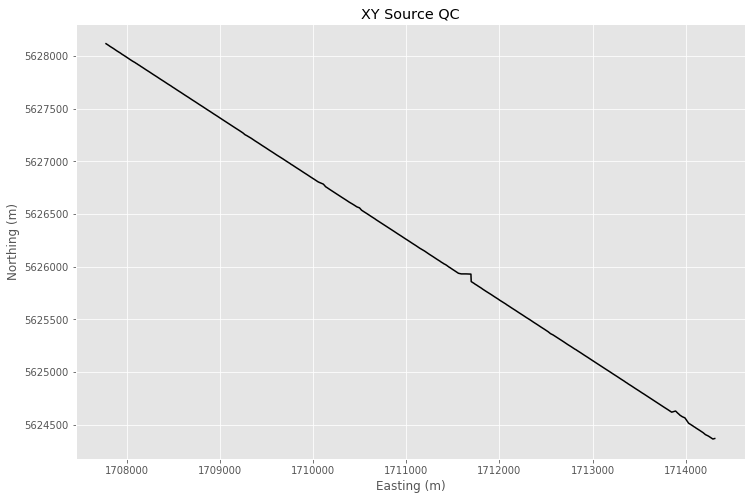

In [14]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(trace_headers['SourceX'], trace_headers['SourceY'], '-k')
ax.set_xlabel('Easting (m)')
ax.set_ylabel('Northing (m)')
ax.set_title('XY Source QC')